Khadijetou Nouredine Sow C17879

Partie 1 : Régression Linéaire

In [7]:
import pandas as pd

# Charger le fichier CSV dans une variable appelée 'df' (pour DataFrame)
df = pd.read_csv('insurance.csv')

# Afficher les 5 premières lignes pour vérifier que tout est ok
print("Aperçu des données :")
display(df.head())

# Afficher les informations générales (colonnes, types, valeurs manquantes)
print("\nInformations sur le dataset :")
df.info()

Aperçu des données :


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Tâches** :  *Analyser les corrélations via une matrice de chaleur (Heatmap)*

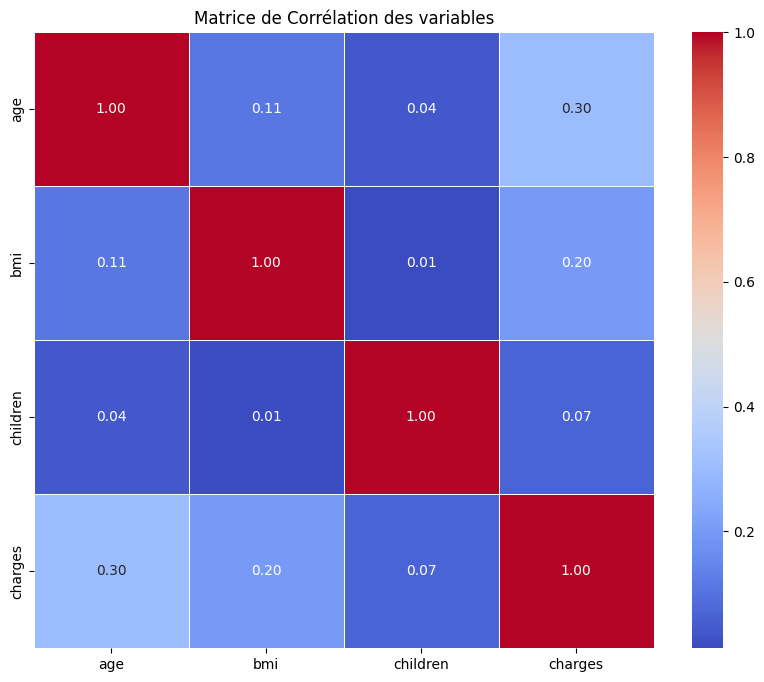

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. On calcule la matrice de corrélation (uniquement sur les colonnes numériques)
corr_matrix = df.select_dtypes(include=['number']).corr()

# 2. On configure la taille de la figure
plt.figure(figsize=(10, 8))

# 3. On dessine la Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# 4. On ajoute un titre
plt.title("Matrice de Corrélation des variables")
plt.show()

Formaliser le modèle : y = β0 +
Pβixi + ϵ

In [9]:
# On choisit nos variables prédictives (en excluant la cible)
# Pour simplifier au début, on ne prend que les colonnes numériques
X = df.select_dtypes(include=['number']).drop('charges', axis=1)

# On définit notre cible
y = df['charges']

print("Variables prédictives (X) :", X.columns.tolist())
print("Cible (y) : charges")

Variables prédictives (X) : ['age', 'bmi', 'children']
Cible (y) : charges


Évaluer la performance avec le coefficient de détermination R2
et l’erreur quadratique moyenne (MSE

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Séparer en 80% entraînement et 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Nombre d'exemples d'entraînement : {len(X_train)}")
print(f"Nombre d'exemples de test : {len(X_test)}")

Nombre d'exemples d'entraînement : 1070
Nombre d'exemples de test : 268


In [15]:
from sklearn.linear_model import LinearRegression

# Initialiser le modèle
model = LinearRegression()

# Entraîner le modèle (le "Fit")
model.fit(X_train, y_train)

# Faire des prédictions sur le jeu de test
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("--- RÉSULTATS RÉGRESSION LINÉAIRE ---")
print(f"R² (Précision relative) : {r2:.2f}")
print(f"MSE (Erreur au carré)  : {mse:.2f}")
print(f"RMSE (Erreur moyenne)  : {rmse:.2f} €")

--- RÉSULTATS RÉGRESSION LINÉAIRE ---
R² (Précision relative) : 0.78
MSE (Erreur au carré)  : 33596915.85
RMSE (Erreur moyenne)  : 5796.28 €


 Interpréter l’importance des variables selon les coefficients βi

In [ ]:
# Afficher les coefficients associés à chaque variable
coefficients = pd.DataFrame(model.coef_, index=X_log.columns, columns=['Coefficient'])
print("Coefficients Beta_i :")
print(coefficients.sort_values(by='Coefficient', ascending=False))

# Afficher l'ordonnée à l'origine (Beta 0)
print(f"\nIntercept (Beta 0) : {model.intercept_:.2f}")

Coefficients Beta_i :
                   Coefficient
smoker_yes        23651.128856
children            425.278784
bmi                 337.092552
age                 256.975706
sex_male            -18.591692
region_northwest   -370.677326
region_southeast   -657.864297
region_southwest   -809.799354

Intercept (Beta 0) : -11931.22


Partie 2: Régression Logistique

Préparation des Données

In [16]:
from sklearn.datasets import load_iris
import pandas as pd

# Charger le dataset
iris = load_iris()
X = iris.data
y = iris.target

# Transformer en binaire : la classe 0 (Setosa) reste 0, toutes les autres deviennent 1
# On crée ainsi un problème "Est-ce une Setosa ou non ?"
y_binary = (y != 0).astype(int)

print("Classes originales :", iris.target_names)
print("Nouvelle répartition (0 vs 1) :", pd.Series(y_binary).value_counts())

Classes originales : ['setosa' 'versicolor' 'virginica']
Nouvelle répartition (0 vs 1) : 1    100
0     50
Name: count, dtype: int64


Normalisation des variables d’entrée

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Normalisation (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 Modéliser la probabilité d’appartenance à l’aide de la fonction sigmoïde : P(y =
1|x) = 1
1+e−z

In [ ]:
from sklearn.linear_model import LogisticRegression

# Créer et entraîner le modèle
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

# Faire des prédictions
y_pred = log_model.predict(X_test_scaled)

Évaluer le modèle via une Matrice de Confusion

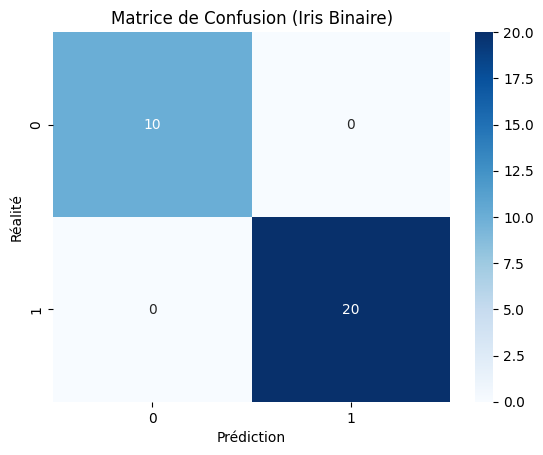

Accuracy (Exactitude) : 1.00
Précision            : 1.00
Rappel (Recall)       : 1.00


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Matrice de Confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédiction')
plt.ylabel('Réalité')
plt.title('Matrice de Confusion (Iris Binaire)')
plt.show()

# 2. Calcul des métriques demandées
print(f"Accuracy (Exactitude) : {accuracy_score(y_test, y_pred):.2f}")
print(f"Précision            : {precision_score(y_test, y_pred):.2f}")
print(f"Rappel (Recall)       : {recall_score(y_test, y_pred):.2f}")

Calculer l’Accuracy, la Précision et le Rappel (Recall)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("--- MÉTRIQUES DE PERFORMANCE (PARTIE 2) ---")
print(f"Accuracy (Exactitude) : {accuracy:.2f}")
print(f"Précision             : {precision:.2f}")
print(f"Rappel (Recall)        : {recall:.2f}")
print(f"F1-Score              : {f1:.2f}")

--- MÉTRIQUES DE PERFORMANCE (PARTIE 2) ---
Accuracy (Exactitude) : 1.00
Précision             : 1.00
Rappel (Recall)        : 1.00
F1-Score              : 1.00
